### Loan Prediction
### Author: Subashini Subramanian
### Date: 13 Aug, 2018
### Data Source: Analytics Vidhya

Loading libraries

In [72]:
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

Reading files

In [73]:
train=pd.read_csv("./data/train.csv")
test=pd.read_csv("./data/test.csv")

Making copies of the dataframe for reference

In [74]:
train_orig=train.copy()
test_orig=test.copy()

Exploring structure of both train and test dataframes

In [75]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [76]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

'Loan_Status'  - the variable to be predicted.

Hypothesis:
1. Higher income individuals will have higher chance of being approved a loan
2. Small amount of loans will be approved easily
3. Valid credit history will have higher chance of loan approval
4. EMI to be low - or longer loan term period will increase chance of loan approval

In [77]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Loan_Status is a categorical variable (T/F)

In [78]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [79]:
train.shape, test.shape

((614, 13), (367, 12))

In [80]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [81]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

### Cleaning data

training data

In [82]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Fill Missing Variables using:

For numerical variables: imputation using mean or median

For categorical variables: imputation using mode

In [83]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [84]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

loan term of 360 occurs for 512 records. Thus we can replace NA values with the mode of the column

In [85]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

Lets go back to how Loan Amount was distributed. The distribution was near normal, thus mean is the best option to replace NA

In [86]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

Lets check missing values here again.

In [87]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Lets look at test data

In [88]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [89]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)

test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)


save cleaned test and train

In [90]:
train_clean=train.copy()
test_clean=test.copy()

### Univariate Analysis

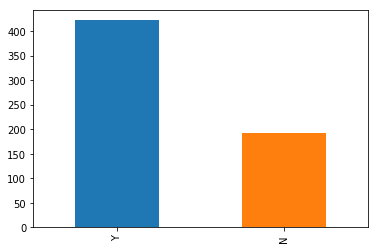

In [91]:
train['Loan_Status'].value_counts().plot.bar()

Independent Categorical Variables - Gender, Married, Self_Employed, Credit_History


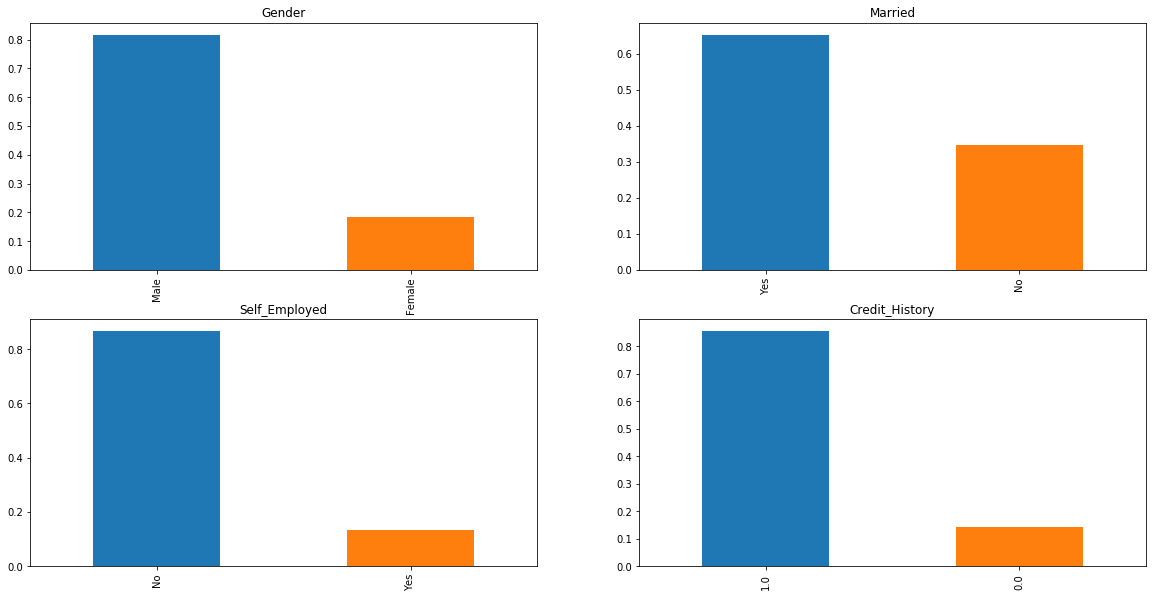

In [92]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.show()

Inference:
Most of the applicants are 
* male (80%) 
* married (65%)
* salaried (85%) 
* have a good credit history (85%).

Ordinal Variables - Dependents, Education, Property Area 

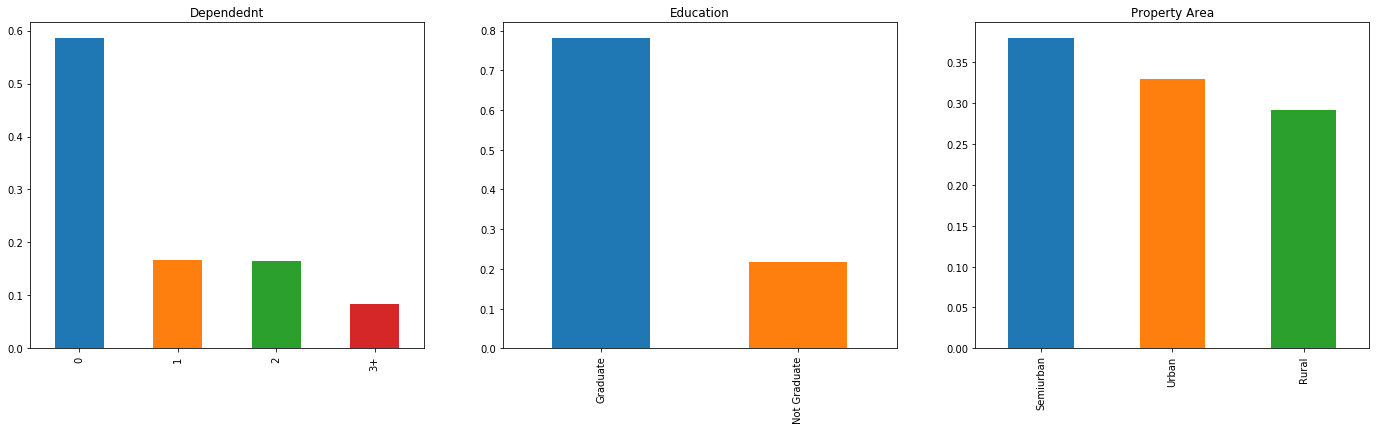

In [93]:
plt.figure(2)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependednt')

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property Area')

plt.show()

Inference: Most applicants
    * have no dependents (57%)
    * are graduates (~80%)
    * live in semi-urban (38%) or urban (32%) areas (combined (~70%))

Continuous Variables - Applicant Income, Co-Applicant income, loan amount, loan term

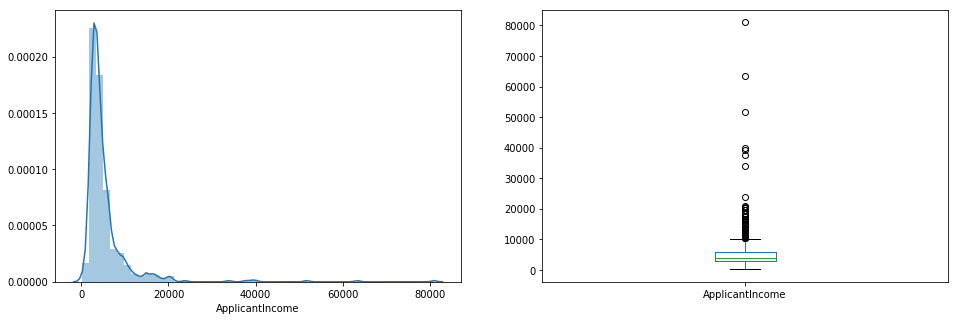

In [94]:
plt.figure(3)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

Applicant income not normally distributed
Box plot confirms extreme values and disparity - lets check this by education levels

Co-applicant Income plotted as dist and box plot

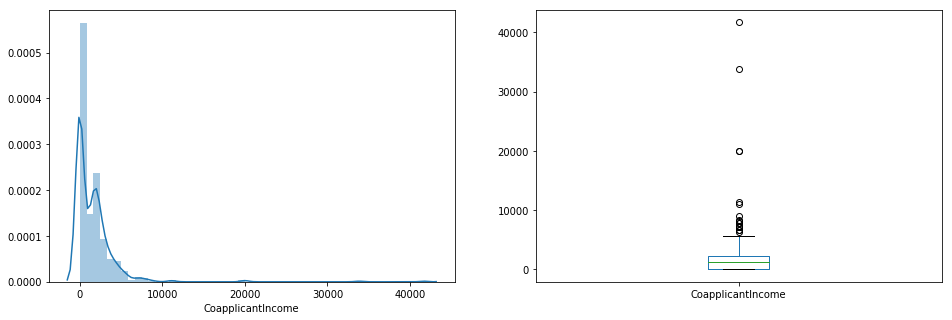

In [95]:
plt.figure(4)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

Co-applicant income is also not normally distributed. Extreme values exists similar to 'Applicant Income'

Lets look at Loan Amount

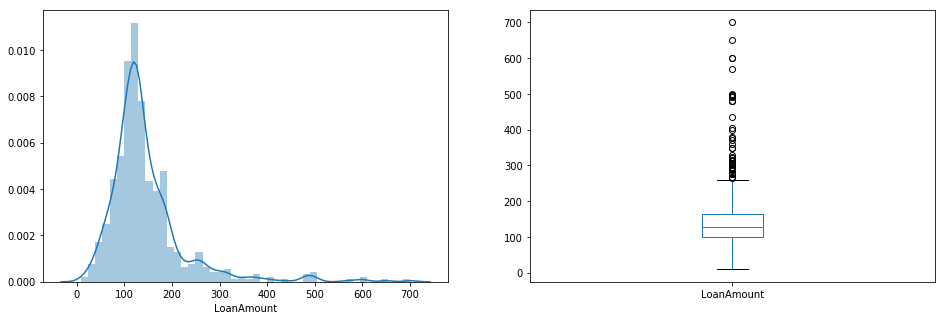

In [96]:
plt.figure(5)
plt.subplot(121)
sns.distplot(train['LoanAmount'].dropna());

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

The distribution looks near normal.

### Bivariate Analyis

Independent categorical variable vs. Target variable

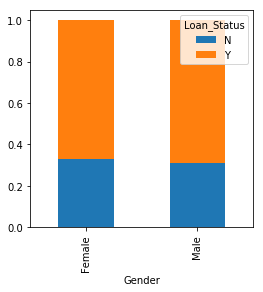

In [97]:
# Gender

Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()


The rate of loan approvals for both gender is almost the same

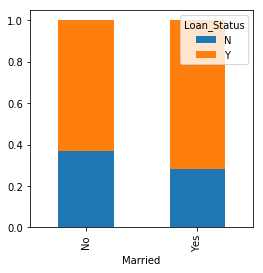

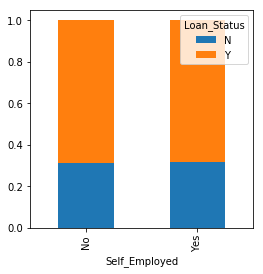

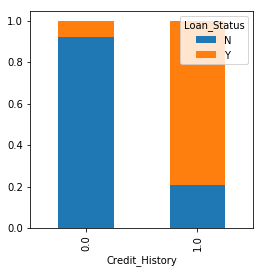

In [98]:
#Married, Self_Employed, Credit_History
Marriage=pd.crosstab(train['Married'], train['Loan_Status'])
Self_emp=pd.crosstab(train['Self_Employed'], train['Loan_Status'])
CreditHis=pd.crosstab(train['Credit_History'], train['Loan_Status'])

Marriage.div(Marriage.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Self_emp.div(Self_emp.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

CreditHis.div(CreditHis.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Self_employed or not, the rate of loan approval is almost equal
Good credit history ensures higher rate of loan approval
Married individuals have a slightly higher rate of loan approval (possibly alluding to their better financial status to run a family)

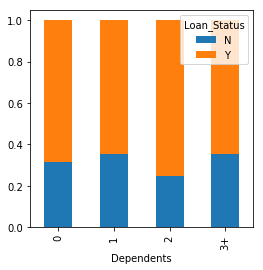

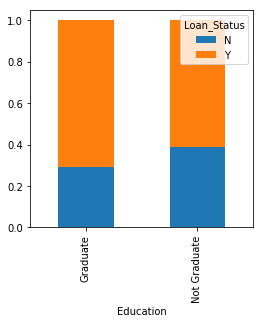

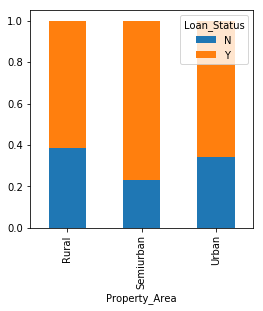

In [99]:
# Dependents, Education, Property Area

Dependents=pd.crosstab(train['Dependents'], train['Loan_Status'])
Education=pd.crosstab(train['Education'], train['Loan_Status'])
PropArea=pd.crosstab(train['Property_Area'], train['Loan_Status'])

Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

PropArea.div(PropArea.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

No trend in dependents against loan approval

Graduate individuals have a higher approval rate (possibly due to increase in income because of higher education)

Semi-urban rates of approval is high

Continuous Variables vs Loan Status

Applicant income vs. Loan Status

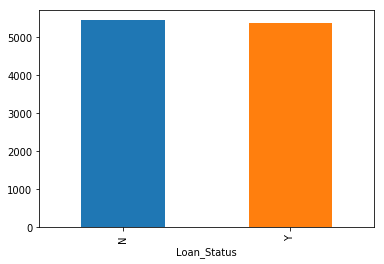

In [100]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.show()

The mean income of individuals both approved and not approved are almost the same. We can try group by bins

0, 2000, 4000, 6000, 8000, 20000, 40000, 80000


In [101]:
bins=[0, 2000, 4000, 6000, 10000, 20000, 40000, 80000]
group=['very low', 'low', 'below average', 'average', 'above average', 'high', 'very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,below average
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,below average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,low
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,below average


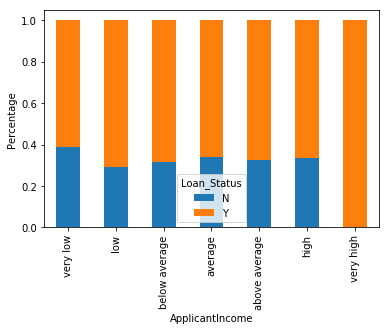

In [102]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

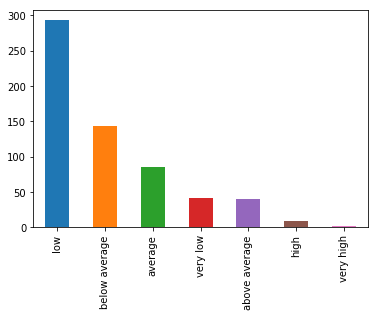

In [103]:
train['Income_bin'].value_counts().plot.bar()

Contrary to our hypothesis, income levels are not markers for loan approvals. except may be for the one extreme point of very high income level.

Similar analysis for co-applicants

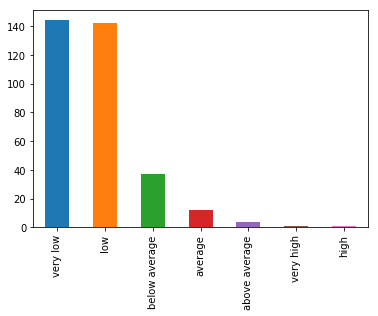

In [104]:
train['CoIncome_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)

train.head()

train['CoIncome_bin'].value_counts().plot.bar()

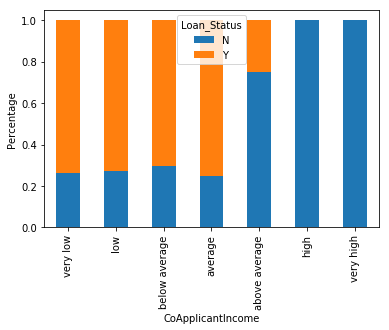

In [105]:
CoIncome_bin=pd.crosstab(train['CoIncome_bin'],train['Loan_Status'])
CoIncome_bin.div(CoIncome_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoApplicantIncome')
P = plt.ylabel('Percentage')

This again is contrary to our hypothesis. As coapplicant income increases, rate of approval decreases. Probably because most applicant do not have a coapplicant and thus coapplicant income is set to 0.

Lets try this again with total income of applicants (Applicant income+ coapplicant income)

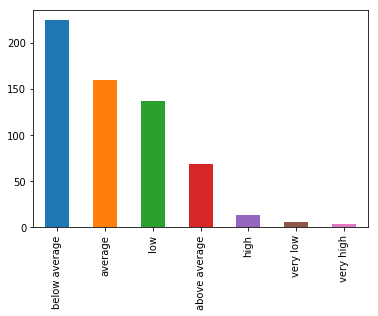

In [106]:
train['Total_Income']=train['CoapplicantIncome']+train['ApplicantIncome']
train['TotIncome_bin']=pd.cut(train['Total_Income'],bins,labels=group)

train.head()

train['TotIncome_bin'].value_counts().plot.bar()

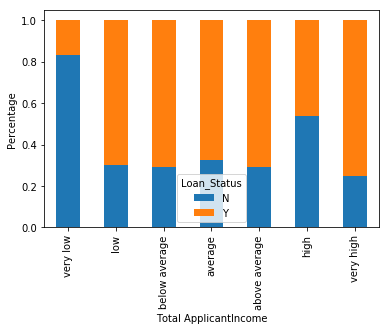

In [107]:
TotIncome_bin=pd.crosstab(train['TotIncome_bin'],train['Loan_Status'])
TotIncome_bin.div(TotIncome_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total ApplicantIncome')
P = plt.ylabel('Percentage')

applications with very low combined income are not approved at the same rate as other income groups.

In [108]:
train.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_bin', 'CoIncome_bin', 'Total_Income', 'TotIncome_bin'],
      dtype='object')

In [109]:
print(train['LoanAmount'].min(), train['LoanAmount'].max() )

9.0 700.0


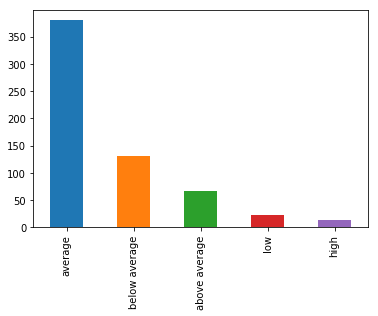

In [110]:
bins=[0, 50, 100, 200, 400, 700]
group=['low', 'below average', 'average', 'above average', 'high']
train['Loanamt_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
train['Loanamt_bin'].value_counts().plot.bar()

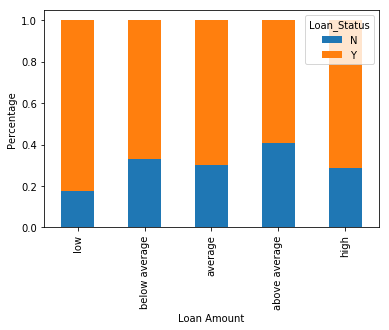

In [111]:
Loanamt_bin=pd.crosstab(train['Loanamt_bin'],train['Loan_Status'])
Loanamt_bin.div(Loanamt_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Loan Amount')
P = plt.ylabel('Percentage')

lower loan amounts face lower rejections

In [112]:
train=train.drop(['Income_bin', 'CoIncome_bin', 'Loanamt_bin', 'TotIncome_bin', 'Total_Income'], axis=1)

Change categorical variables from characters to numbers for correlation matrix

In [113]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [114]:
train['Gender'].mode()[0]

'Male'

In [115]:
train['Gender'].replace('Male', 1, inplace=True)
train['Gender'].replace('Female', 2, inplace=True)

train['Married'].replace('Yes', 1, inplace=True)
train['Married'].replace('No', 0, inplace=True)

train['Dependents'].replace('0', 0, inplace=True)
train['Dependents'].replace('1', 1, inplace=True)
train['Dependents'].replace('2', 2, inplace=True)
train['Dependents'].replace('3+', 3, inplace=True)

train['Education'].replace('Graduate', 1, inplace=True)
train['Education'].replace('Not Graduate', 0, inplace=True)

train['Self_Employed'].replace('Yes', 1, inplace=True)
train['Self_Employed'].replace('No', 0, inplace=True)

train['Property_Area'].replace('Urban', 1, inplace=True)
train['Property_Area'].replace('Semiurban', 2, inplace=True)
train['Property_Area'].replace('Rural', 1, inplace=True)

train['Loan_Status'].replace('Y', 1, inplace=True)
train['Loan_Status'].replace('N', 0, inplace=True)

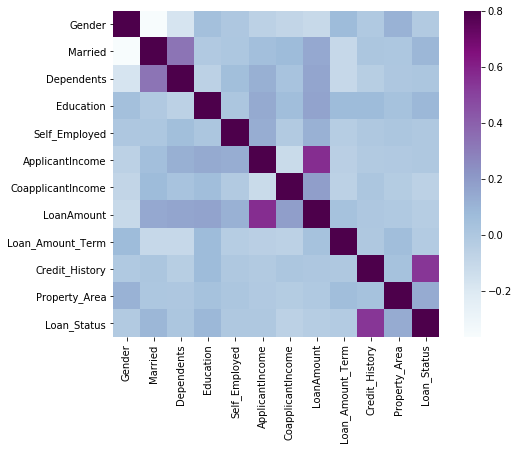

In [116]:
corr_matrix=train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr_matrix, vmax=.8, square=True, cmap="BuPu");

Applicant Income and Loan Amount are correlated as is Co-applicant income and loan amount. The target variable is correlated to Credit History

Looking at target variable 'Loan_Status'

### Logistic Regression

lets use the clean data again and not use modified column values

In [117]:
df_train=train_clean
df_test=test_clean

df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [118]:
df_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

Lets recreate figure 5. Distribution of 'LoanAmount'

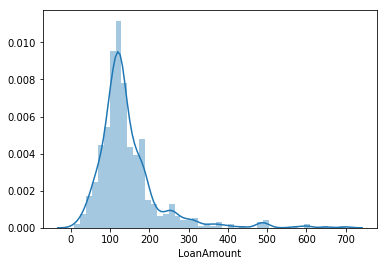

In [119]:
plt.figure(5)
sns.distplot(df_train['LoanAmount']);

plt.show()

The distribution is near normal, but skewed towards the right due to extreme values in loan amount. To normalize this, we can log transform the data set (both train and test)

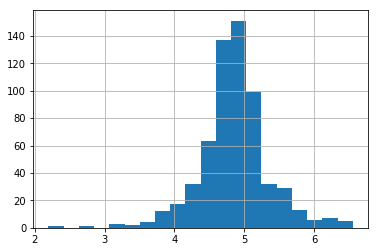

In [120]:
df_train['LoanAmount_log']=np.log(df_train['LoanAmount'])
df_test['LoanAmount_log']=np.log(df_test['LoanAmount'])

df_train['LoanAmount_log'].hist(bins=20)

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. 
A logistic regression model will be built

Logistic Regression is a classification algorithm that predicts binary outcomes

lets separate the Loan_ID out off the data set

In [121]:
df_train=df_train.drop('Loan_ID',axis=1)
df_test=df_test.drop('Loan_ID',axis=1)

Lets split the dataframe into predictors (X) and predicted (Y)

In [122]:
X = df_train.drop('Loan_Status',1)
Y = df_train.Loan_Status

Lets build the model. 

Step 1: Get dummies for Gender, Employed Graduate etc


In [123]:
X=pd.get_dummies(X)
df_train=pd.get_dummies(df_train)
df_test=pd.get_dummies(df_test)



In [124]:
df_test.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,4.700480,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,4.836282,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,5.337538,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,4.605170,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,4.356709,0,1,1,0,...,0,0,0,0,1,1,0,0,0,1


In [125]:
df_test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,4.700480,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,4.836282,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,5.337538,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,4.605170,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,4.356709,0,1,1,0,...,0,0,0,0,1,1,0,0,0,1


Step 1: Split X and Y 80:20

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
x_train, x_cv, y_train, y_cv = train_test_split(X,Y, test_size =0.2)

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [130]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [131]:
pred_cv = model.predict(x_cv)

In [132]:
accuracy_score(y_cv,pred_cv)

0.8211382113821138

In [136]:
from sklearn.metrics import confusion_matrix

In [137]:
confusion_matrix(y_cv,pred_cv)

array([[16, 20],
       [ 2, 85]])

In [61]:
pred_test = model.predict(df_test)

We have about 83% accuracy. Lets create the submission file. 

In [133]:
submission=pd.read_csv("./data/Sample_Submission.csv")

In [134]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_orig['Loan_ID']

In [135]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic_submit.csv')

### Accuracy 83%